In [34]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [5]:
from IPython.display import display, Markdown, Latex
from urllib import request

# Data source:
# https://archive.ics.uci.edu/ml/datasets/Adult

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'
# Arquivo texto, delimitado por vírgulas, sem cabeçalho

data_raw=[]

for line in urllib.request.urlopen(url):
    # from bytes-like object to string
    lined = line.decode()
    # separa cada linha em campos (separados por vírgula)
    field_lst = str(lined).split(', ')
    
    # inclui no data frame se o número de atributos for o esperado
    if len(field_lst)==15:
        data_raw.append(field_lst[0:15])
    else:
        print('skipped data (error? blank line?):', line)
        
# cria dataframe pandas com dados

import pandas as pd
df = pd.DataFrame(data_raw)
df.shape

df.columns = ['age', 'type_employer', 'fnlwgt', 'education', 
                "education_num","marital", "occupation", "relationship", "race","sex",
                "capital_gain", "capital_loss", "hr_per_week","country","income"]

skipped data (error? blank line?): b'\n'


In [6]:
df.head()

,age,type_employer,fnlwgt,education,education_num,marital,occupation,relationship,race,sex,capital_gain,capital_loss,hr_per_week,country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K\n
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K\n
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K\n
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K\n
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K\n


In [ ]:
# ajusta os tipos das colunas numéricas

def str_to_int(c):
    if isinstance(c, int):
        return c
    else:
        try:
            return int(c)
        except:
            return None
  

df.age = df.age.apply(str_to_int)
df.fnlwgt = df.fnlwgt.apply(str_to_int)
df.education_num = df.education_num.apply(str_to_int)
df.capital_gain = df.capital_gain.apply(str_to_int)
df.capital_loss = df.capital_loss.apply(str_to_int)
df.hr_per_week = df.hr_per_week.apply(str_to_int)

df.info()

In [172]:
occupation_marital_df = df.groupby(['occupation', 'marital']).size()
occupation_marital_wide_df = occupation_marital_df.unstack('marital')
occupation_marital_wide_df = occupation_marital_wide_df[1:]
occupation_marital_wide_df = occupation_marital_wide_df.drop('Armed-Forces').reset_index()
occupation_marital_wide_df = occupation_marital_wide_df.drop('Married-AF-spouse', axis=1)
occupation_marital_wide_df = occupation_marital_wide_df.fillna(1)
occupation_marital_wide_df

marital,occupation,Divorced,Married-civ-spouse,Married-spouse-absent,Never-married,Separated,Widowed
0,Adm-clerical,819.0,986.0,59.0,1591.0,147.0,163.0
1,Craft-repair,464.0,2564.0,52.0,872.0,103.0,41.0
2,Exec-managerial,604.0,2444.0,31.0,799.0,94.0,93.0
3,Farming-fishing,64.0,575.0,24.0,289.0,18.0,23.0
4,Handlers-cleaners,128.0,467.0,23.0,696.0,38.0,18.0
5,Machine-op-inspct,277.0,991.0,26.0,571.0,84.0,53.0
6,Other-service,501.0,723.0,59.0,1641.0,190.0,177.0
7,Priv-house-serv,28.0,16.0,4.0,67.0,12.0,22.0
8,Prof-specialty,539.0,2126.0,47.0,1234.0,99.0,92.0
9,Protective-serv,79.0,383.0,5.0,156.0,16.0,9.0


ValueError: not enough values to unpack (expected 6, got 5)

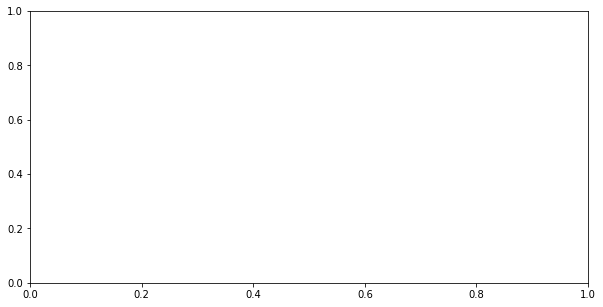

In [179]:
# Create a figure with a single subplot
f, ax = plt.subplots(1, figsize=(10,5))
bar_width = 1

# positions of the left bar-boundaries
bar_l = [i for i in range(len(occupation_marital_wide_df['Divorced']))] 

# positions of the x-axis ticks (center of the bars as bar labels)
tick_pos = [i+(bar_width/2) for i in bar_l] 

# Create the total score for each participant
totals = [i+j+k+l+m for i,j,k,l,m,n in zip(occupation_marital_wide_df['Divorced'], 
                        occupation_marital_wide_df['Married-civ-spouse'],occupation_marital_wide_df['Never-married'], 
                         occupation_marital_wide_df['Separated'], occupation_marital_wide_df['Widowed'])]


divorced_rel = [i / j * 100 for  i,j in zip(occupation_marital_wide_df['Divorced'], totals)]
married_af_red = [i / j * 100 for  i,j in zip(occupation_marital_wide_df['Married-AF-spouse'], totals)]
married_clv_rel = [i / j * 100 for  i,j in zip(occupation_marital_wide_df['Married-civ-spouse'], totals)]
never_maried_rel = [i / j * 100 for  i,j in zip(occupation_marital_wide_df['Never-married'], totals)]
separated_rel = [i / j * 100 for  i,j in zip(occupation_marital_wide_df['Separated'], totals)]
widowed_rel = [i / j * 100 for  i,j in zip(occupation_marital_wide_df['Widowed'], totals)]


ax.bar(bar_l, divorced_rel, label='Divorced', alpha=0.9, color='#019600', width=bar_width, edgecolor='white')
ax.bar(bar_l, married_clv_rel,bottom=divorced_rel,label='Married-civ-spouse',alpha=0.9,color='#000000',width=bar_width,edgecolor='white')
ax.bar(bar_l, never_maried_rel,bottom=[i+j for i,j in zip(divorced_rel, married_clv_rel)],label='Never Married',alpha=0.9,color='#219AD8',width=bar_width,edgecolor='white')
ax.bar(bar_l, separated_rel, bottom=[i+j+k for i,j,k in zip(divorced_rel, married_clv_rel, never_maried_rel)], label='Separated',alpha=0.4, color='#219AD8', width=bar_width,edgecolor='white')
ax.bar(bar_l, widowed_rel, bottom=[i+j+k+l for i,j,k,l in zip(divorced_rel, married_clv_rel, never_maried_rel, separated_rel)], label='Widowed',alpha=0.9, color='#C694D8', width=bar_width,edgecolor='white')
# ax.bar(bar_l, widowed_rel, bottom=[i+j+k+l+m for i,j,k,l,m in zip(divorced_rel, married_clv_rel, never_maried_rel, separated_rel)], label='Widowed',alpha=0.9, color='#A094A8', width=bar_width,edgecolor='white')

plt.xticks(tick_pos, occupation_marital_wide_df['occupation'])
ax.set_ylabel("Percentage")
ax.set_xlabel("")

# Let the borders of the graphic
plt.xlim([min(tick_pos)-bar_width, max(tick_pos)+bar_width])
plt.ylim(0, 100)

# rotate axis labels
plt.setp(plt.gca().get_xticklabels(), rotation=30, horizontalalignment='right')
# Now add the legend with some customizations.

plt.legend(loc='upper right', shadow=True)
# Shrink current axis by 20%
box = ax.get_position()
# Put a legend to the right of the current axis
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# shot plot
plt.show()